In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
fake_news=pd.read_csv('fakenews.csv')
fake_news.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
## check the shape of dataset
fake_news.shape

(6335, 4)

In [5]:
## nulll value
fake_news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
## information of dataset
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
## Text preprocessing
## import basic libary
import nltk
import re

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punk')
nltk.download('stopwords')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ThinkPad-T570Worksta\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
fake_news.reset_index(inplace=True)

In [11]:
## removing special character and upper and lower case
import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
corpus = []
for i in range(0,len(fake_news)):
    review = re.sub('[^a-zA-Z]',' ', fake_news['title'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [12]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [13]:
## Embedding Technique
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
## vocabulary length
voca_size = 500

In [16]:
one_hot_reps = [one_hot(word,voca_size) for word in corpus]
print(one_hot_reps)

[[160, 214, 399], [75, 63, 330, 448, 67, 133, 411, 317, 292, 398, 141], [12, 64, 343, 311, 265], [155, 167, 480, 222, 358, 314, 122, 192], [424, 86, 431, 293, 487], [118, 240], [99, 262, 75, 126, 247, 458], [309, 290, 138], [298, 281, 292, 346, 107, 87, 387], [440, 369, 456, 86, 32, 468, 38, 147, 221], [371, 346, 470, 36, 149, 76, 214, 346, 18], [34, 292, 320, 206, 309, 193, 238, 31, 235, 435], [33, 305, 277, 357, 209, 414, 25, 87, 141], [25, 157, 302, 279, 197], [292, 3, 396, 458], [258, 229, 205], [294, 488, 401, 214, 273, 11, 406, 120, 302], [214, 346, 439, 496, 157, 498, 314, 491, 44, 258, 58, 422, 25], [440, 393, 401, 499], [99, 120, 36, 6, 78, 8, 157], [75, 50, 292, 387, 127, 323], [381, 17, 268, 75, 327, 415, 35, 323, 319], [214, 346, 456, 417, 354, 448, 161], [86, 27, 279, 302, 386, 264, 211, 291], [393, 365, 104], [91, 292, 411, 166, 485, 41, 309, 449], [244, 441, 346, 499, 397, 456, 205], [34, 292, 111, 18, 312, 88, 131], [451, 83, 34, 292, 18, 76, 83, 36, 404, 251, 415, 399,

In [17]:
## importing importance libary
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
## sentance length
sent_length = 20

In [22]:
embedding_doc = pad_sequences(one_hot_reps,padding='post', maxlen=sent_length)
print(embedding_doc)

[[160 214 399 ...   0   0   0]
 [ 75  63 330 ...   0   0   0]
 [ 12  64 343 ...   0   0   0]
 ...
 [ 91 292 330 ...   0   0   0]
 [449 401 166 ...   0   0   0]
 [307 476 379 ...   0   0   0]]


In [23]:
embedding_doc[0]

array([160, 214, 399,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [24]:
embedding_doc[1]

array([ 75,  63, 330, 448,  67, 133, 411, 317, 292, 398, 141,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [25]:
## feature representance
feature_represent = 50

In [28]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RNN

In [61]:
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Dropout

In [65]:
## train the lstm model
model = Sequential()
model.add(Embedding(voca_size,feature_represent,input_length=sent_length))
model.add(LSTM(100))
#model.add(BatchNormalization)
model.add(Dense(1, activation='sigmoid'))




In [66]:
model.add(Dropout(0.1))

In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 50)            25000     
                                                                 
 lstm_11 (LSTM)              (None, 100)               60400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 85,501
Trainable params: 85,501
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
y=pd.get_dummies(fake_news['label'])
y = y.iloc[:,1].values

In [70]:
import numpy as np
X = np.array(embedding_doc)

In [71]:
y

array([0, 0, 1, ..., 0, 1, 1], dtype=uint8)

In [72]:
X

array([[160, 214, 399, ...,   0,   0,   0],
       [ 75,  63, 330, ...,   0,   0,   0],
       [ 12,  64, 343, ...,   0,   0,   0],
       ...,
       [ 91, 292, 330, ...,   0,   0,   0],
       [449, 401, 166, ...,   0,   0,   0],
       [307, 476, 379, ...,   0,   0,   0]])

In [73]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print('shape of X_train', X_train.shape)
print('shape of X_test', X_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of X_train (5068, 20)
shape of X_test (1267, 20)
shape of y_train (5068,)
shape of y_test (1267,)


In [74]:
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, batch_size=60)

Epoch 1/20
85/85 [==============================] - 7s 39ms/step - loss: 1.3268 - accuracy: 0.5622 - val_loss: 0.5932 - val_accuracy: 0.6930
Epoch 2/20
85/85 [==============================] - 3s 30ms/step - loss: 1.2510 - accuracy: 0.7210 - val_loss: 0.5546 - val_accuracy: 0.7119
Epoch 3/20
85/85 [==============================] - 2s 29ms/step - loss: 1.1471 - accuracy: 0.7390 - val_loss: 0.5469 - val_accuracy: 0.7364
Epoch 4/20
85/85 [==============================] - 2s 29ms/step - loss: 1.2434 - accuracy: 0.7455 - val_loss: 0.5684 - val_accuracy: 0.7356
Epoch 5/20
85/85 [==============================] - 2s 28ms/step - loss: 1.2073 - accuracy: 0.7498 - val_loss: 0.5842 - val_accuracy: 0.6985
Epoch 6/20
85/85 [==============================] - 3s 31ms/step - loss: 1.1103 - accuracy: 0.7601 - val_loss: 0.5486 - val_accuracy: 0.7340
Epoch 7/20
85/85 [==============================] - 3s 30ms/step - loss: 1.2038 - accuracy: 0.7559 - val_loss: 0.5551 - val_accuracy: 0.7285
Epoch 8/20
85

In [79]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [80]:
from matplotlib import pyplot as plt

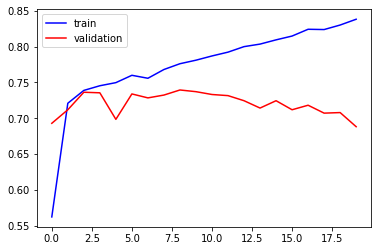

In [81]:
## ploting accuracy
plt.plot(model_history.history['accuracy'], color='blue',label='train')
plt.plot(model_history.history['val_accuracy'], color='red', label='validation')
plt.legend()
plt.show()

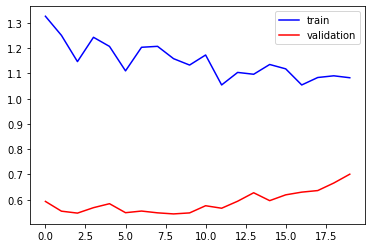

In [82]:
plt.plot(model_history.history['loss'], color='blue',label='train')
plt.plot(model_history.history['val_loss'], color='red', label='validation')
plt.legend()
plt.show()

In [83]:
## prediction with x_test
y_pred = model.predict(X_test)

40/40 [==============================] - 1s 9ms/step


In [84]:
print(y_pred)

[[0.15006097]
 [0.15812562]
 [0.01852104]
 ...
 [0.84263474]
 [0.8592275 ]
 [0.81723475]]


In [85]:
y_pred = np.where(y_pred>0.6,1,0)

In [86]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[499 129]
 [274 365]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       628
           1       0.74      0.57      0.64       639

    accuracy                           0.68      1267
   macro avg       0.69      0.68      0.68      1267
weighted avg       0.69      0.68      0.68      1267

0.6819258089976322


In [90]:
residual = y_test - y_pred